# Séance 4 — Scikit-learn : Pipeline ML rapide

## 🎯 Objectifs
- Comprendre et utiliser les pipelines scikit-learn
- Maîtriser le preprocessing de données textuelles
- Implémenter une évaluation rigoureuse des modèles
- Construire une baseline de classification binaire

---

## 📚 Introduction

**Scikit-learn** est la bibliothèque de référence pour le machine learning en Python. Les **pipelines** permettent d'enchaîner plusieurs étapes de preprocessing et de modélisation de manière propre et reproductible.

**Installation :**
```bash
pip install scikit-learn pandas numpy matplotlib
```

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import warnings
warnings.filterwarnings('ignore')

# Configuration
np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 🤖 Introduction au Machine Learning

### 📖 Qu'est-ce que le Machine Learning ?

Le **Machine Learning** (apprentissage automatique) est une branche de l'intelligence artificielle qui permet aux ordinateurs d'apprendre à partir de données sans être explicitement programmés. Au lieu d'écrire des règles fixes, nous entraînons des modèles à reconnaître des patterns dans les données.

### 🎯 Types de Machine Learning

| Type | Description | Objectif | Exemples d'applications |
|------|-------------|----------|------------------------|
| **Apprentissage supervisé** | Le modèle apprend à partir de données étiquetées | Prédire une valeur ou une classe | Classification d'emails (spam/non-spam), prédiction de prix |
| **Apprentissage non-supervisé** | Le modèle trouve des structures cachées dans des données non-étiquetées | Découvrir des groupes ou patterns | Segmentation de clients, détection d'anomalies |
| **Apprentissage par renforcement** | Le modèle apprend par essai-erreur avec des récompenses/pénalités | Optimiser une séquence de décisions | Jeux, robots autonomes, trading |

### 📊 Types de modèles supervisés

#### Classification (prédire une catégorie)

| Algorithme | Principe | Avantages | Inconvénients | Cas d'usage |
|------------|----------|-----------|---------------|-------------|
| **Logistic Regression** | Modèle linéaire avec fonction sigmoïde | Simple, interprétable, rapide | Limité aux relations linéaires | Classification binaire simple |
| **Naive Bayes** | Probabilités conditionnelles (Théorème de Bayes) | Rapide, efficace sur texte | Hypothèse d'indépendance forte | Classification de texte, spam |
| **Decision Tree** | Arbre de décisions binaires | Interprétable, gère non-linéarité | Tendance au surapprentissage | Diagnostics médicaux |
| **Random Forest** | Ensemble d'arbres de décision | Robuste, gère bien les données bruitées | Moins interprétable, plus lent | Classification généraliste |
| **SVM** | Trouve l'hyperplan optimal de séparation | Efficace en haute dimension | Coûteux en calcul | Classification d'images |
| **Neural Networks** | Réseau de neurones artificiels | Très puissant, gère la complexité | Boîte noire, beaucoup de données nécessaires | Vision, NLP, etc. |

#### Régression (prédire une valeur continue)

| Algorithme | Principe | Quand l'utiliser |
|------------|----------|------------------|
| **Linear Regression** | Relation linéaire entre variables | Relations simples et linéaires |
| **Ridge/Lasso** | Régression linéaire avec régularisation | Éviter le surapprentissage |
| **Random Forest Regressor** | Ensemble d'arbres pour régression | Relations non-linéaires complexes |
| **XGBoost/LightGBM** | Gradient boosting optimisé | Compétitions, haute performance |

---

## 📈 Métriques d'évaluation : Guide complet

### 🎯 Pourquoi les métriques sont importantes ?

Choisir la bonne métrique est **crucial** car elle détermine comment vous évaluez et optimisez votre modèle. Une métrique inappropriée peut conduire à un modèle qui performe bien sur le papier mais échoue en production.

### 📊 Métriques de classification

#### Matrice de confusion

Tous les métriques de classification proviennent de la **matrice de confusion** :

|  | Prédit Positif | Prédit Négatif |
|--|----------------|----------------|
| **Réel Positif** | VP (Vrai Positif) | FN (Faux Négatif) |
| **Réel Négatif** | FP (Faux Positif) | VN (Vrai Négatif) |

#### Métriques principales

| Métrique | Formule | Signification | Quand l'utiliser | Exemple concret |
|----------|---------|---------------|------------------|-----------------|
| **Accuracy** | (VP + VN) / Total | % de prédictions correctes | Classes équilibrées, erreurs ont même coût | Reconnaissance de chiffres (0-9 équilibrés) |
| **Precision** | VP / (VP + FP) | % de prédictions positives qui sont vraies | Minimiser les faux positifs | Filtrage spam (éviter de bloquer vrais emails) |
| **Recall (Sensibilité)** | VP / (VP + FN) | % de vrais positifs détectés | Minimiser les faux négatifs | Diagnostic cancer (ne rater aucun cas) |
| **F1-Score** | 2 × (Precision × Recall) / (Precision + Recall) | Moyenne harmonique de Precision et Recall | Équilibre entre Precision et Recall | Détection de fraude (balance faux pos/nég) |
| **Specificity** | VN / (VN + FP) | % de vrais négatifs détectés | Important de bien identifier les négatifs | Tests médicaux (éviter fausses alarmes) |
| **AUC-ROC** | Aire sous courbe ROC | Capacité à discriminer les classes | Évaluation globale, indépendante du seuil | Scoring de risque crédit |

#### 💡 Comment choisir la bonne métrique ?

**Scénario 1 : Détection de maladie rare**
- **Problème** : 1% de malades, 99% de sains
- **Métrique** : Recall (sensibilité) ⭐⭐⭐
- **Pourquoi** : Il est critique de détecter TOUS les cas positifs (ne rater aucun malade)
- **Accuracy** : ❌ Un modèle qui prédit toujours "sain" aurait 99% accuracy mais serait inutile!

**Scénario 2 : Filtrage d'emails spam**
- **Problème** : Ne pas bloquer les vrais emails importants
- **Métrique** : Precision ⭐⭐⭐
- **Pourquoi** : Les faux positifs (vrais emails marqués spam) sont très coûteux
- **Recall** : Moins critique (quelques spams passent, ce n'est pas grave)

**Scénario 3 : Détection de fraude bancaire**
- **Problème** : Équilibrer détection et fausses alertes
- **Métrique** : F1-Score ⭐⭐⭐
- **Pourquoi** : Balance entre détecter les fraudes (recall) et éviter de bloquer clients légitimes (precision)

**Scénario 4 : Classification d'images (10 classes équilibrées)**
- **Problème** : Classes équilibrées, toutes les erreurs ont le même coût
- **Métrique** : Accuracy ⭐⭐⭐
- **Pourquoi** : Simple et suffisant quand les classes sont équilibrées

### 📐 Interprétation des scores

| Score | Interprétation | Signification |
|-------|---------------|---------------|
| **0.90 - 1.00** | ⭐⭐⭐ Excellent | Modèle très performant |
| **0.80 - 0.90** | ⭐⭐ Bon | Performance satisfaisante |
| **0.70 - 0.80** | ⭐ Acceptable | Peut nécessiter des améliorations |
| **0.50 - 0.70** | ⚠️ Faible | Modèle peu fiable |
| **< 0.50** | ❌ Très faible | Pire qu'aléatoire (pour classification binaire) |

### ⚖️ Trade-offs importants

**Precision vs Recall** :
- ↑ Precision → ↓ Recall (et vice versa)
- Ajuster le seuil de décision selon les priorités métier
- F1-Score trouve le compromis optimal

**Bias vs Variance** :
- **Underfitting** (biais élevé) : Modèle trop simple, mauvaise performance train ET test
- **Overfitting** (variance élevée) : Modèle trop complexe, bonne performance train, mauvaise test
- **Solution** : Validation croisée, régularisation, plus de données

### 📋 Checklist d'évaluation

Avant de valider un modèle :

- [ ] Vérifier la distribution des classes (équilibrée ou non)
- [ ] Analyser la matrice de confusion
- [ ] Calculer plusieurs métriques (pas seulement accuracy)
- [ ] Faire une validation croisée (k-fold)
- [ ] Tester sur un jeu de données complètement séparé
- [ ] Considérer le coût métier des erreurs
- [ ] Visualiser les courbes d'apprentissage
- [ ] Vérifier l'absence de data leakage

---

## 📊 1. Création du dataset

Nous allons créer un dataset de documents textuels classés en deux catégories : **FAQ** et **Blog**.

In [2]:
# Exemples de textes FAQ (questions-réponses courtes)
faq_texts = [
    "Comment réinitialiser mon mot de passe ?",
    "Quels sont vos horaires d'ouverture ?",
    "Où puis-je trouver ma facture ?",
    "Comment contacter le support technique ?",
    "Quels modes de paiement acceptez-vous ?",
    "Comment suivre ma commande ?",
    "Puis-je retourner un article ?",
    "Quelle est votre politique de remboursement ?",
    "Comment créer un compte ?",
    "Où est situé votre magasin ?"
] * 15  # Répéter pour avoir plus de données

# Exemples de textes Blog (articles plus longs)
blog_texts = [
    "Dans cet article, nous allons explorer les tendances du machine learning pour 2024. L'intelligence artificielle continue de révolutionner notre façon de travailler et d'interagir avec la technologie. Les modèles de langage comme GPT-4 et leurs applications sont de plus en plus sophistiqués.",
    "Le développement web moderne nécessite une compréhension approfondie de plusieurs technologies. JavaScript, React, et les frameworks backend comme Django ou FastAPI sont essentiels. Dans ce guide complet, nous aborderons les meilleures pratiques pour construire des applications robustes et scalables.",
    "L'analyse de données est devenue une compétence cruciale dans le monde professionnel actuel. Python et ses bibliothèques comme Pandas, NumPy et Matplotlib offrent des outils puissants. Découvrez comment transformer vos données brutes en insights actionnables grâce à ces techniques avancées.",
    "La cybersécurité est un enjeu majeur pour toutes les entreprises. Les attaques informatiques se multiplient et deviennent de plus en plus sophistiquées. Dans cet article détaillé, nous explorons les meilleures stratégies de protection et les outils essentiels pour sécuriser votre infrastructure.",
    "Le cloud computing a transformé la façon dont les entreprises déploient et gèrent leurs applications. AWS, Azure et Google Cloud Platform offrent des services variés et puissants. Nous allons examiner les avantages et inconvénients de chaque plateforme pour vous aider à faire le bon choix.",
    "L'optimisation des performances web est cruciale pour l'expérience utilisateur. Des temps de chargement rapides peuvent significativement améliorer les taux de conversion. Dans ce tutoriel approfondi, nous verrons comment optimiser vos images, minimiser le JavaScript et implémenter le lazy loading.",
    "Les bases de données NoSQL comme MongoDB et Cassandra offrent une alternative flexible aux bases relationnelles traditionnelles. Leur architecture distribuée permet une scalabilité horizontale impressionnante. Découvrez quand et comment utiliser ces technologies dans vos projets.",
    "Le DevOps est une culture et un ensemble de pratiques qui visent à unifier le développement et les opérations. L'automatisation avec des outils comme Jenkins, Docker et Kubernetes est essentielle. Apprenez à mettre en place une pipeline CI/CD efficace pour votre équipe.",
    "L'apprentissage profond révolutionne la vision par ordinateur et le traitement du langage naturel. Les réseaux de neurones convolutifs et les transformers sont au cœur de ces avancées. Dans ce guide technique, nous explorerons l'architecture de ces modèles et leurs applications pratiques.",
    "Le design UX/UI est bien plus qu'une simple question d'esthétique. Il s'agit de créer des expériences utilisateur intuitives et agréables. Nous explorerons les principes fondamentaux du design centré sur l'utilisateur et comment les appliquer dans vos projets."
] * 15  # Répéter pour avoir plus de données

# Création du DataFrame
df = pd.DataFrame({
    'text': faq_texts + blog_texts,
    'category': ['FAQ'] * len(faq_texts) + ['Blog'] * len(blog_texts)
})

# Mélanger les données
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Dataset créé avec {len(df)} documents")
print(f"\nDistribution des classes:")
print(df['category'].value_counts())
print("\nExemples:")
print(df.head())

Dataset créé avec 300 documents

Distribution des classes:
category
Blog    150
FAQ     150
Name: count, dtype: int64

Exemples:
                                                text category
0  La cybersécurité est un enjeu majeur pour tout...     Blog
1  Les bases de données NoSQL comme MongoDB et Ca...     Blog
2  L'analyse de données est devenue une compétenc...     Blog
3                       Où est situé votre magasin ?      FAQ
4  La cybersécurité est un enjeu majeur pour tout...     Blog


## 🔍 2. Analyse exploratoire

STATISTIQUES PAR CATÉGORIE
         text_length                      word_count                  
                mean        std  min  max       mean       std min max
category                                                              
Blog           286.7  12.419270  260  301       40.1  2.671626  35  45
FAQ             34.3   6.378182   25   45        5.9  0.702345   5   7


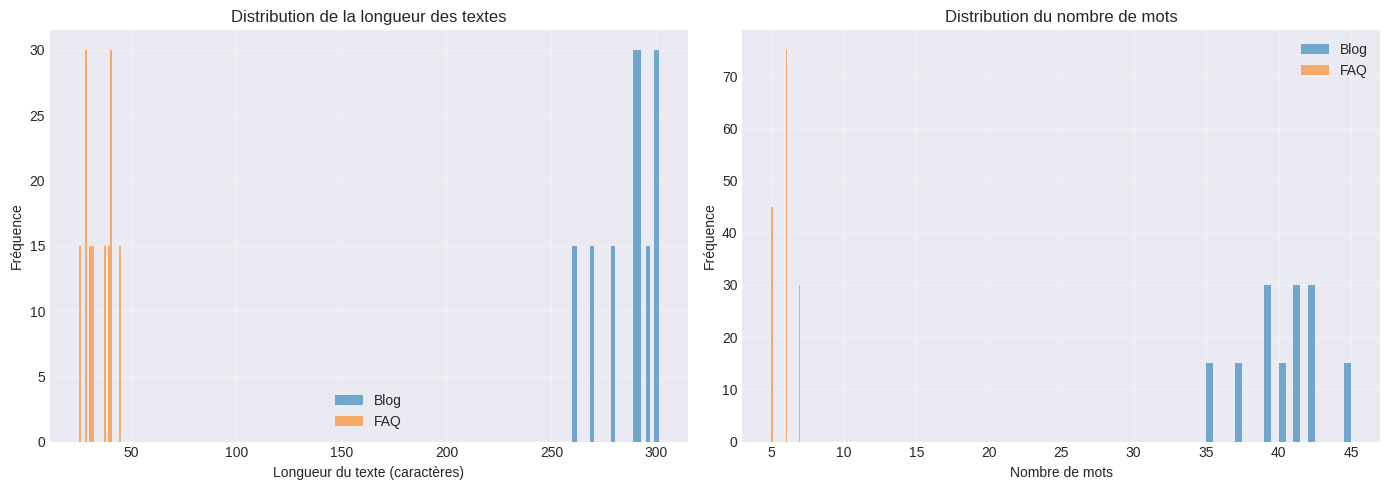

In [3]:
# Longueur des textes
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

# Statistiques par catégorie
print("=" * 60)
print("STATISTIQUES PAR CATÉGORIE")
print("=" * 60)
stats = df.groupby('category')[['text_length', 'word_count']].agg(['mean', 'std', 'min', 'max'])
print(stats)

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogramme longueur des textes
for cat in df['category'].unique():
    data = df[df['category'] == cat]['text_length']
    axes[0].hist(data, alpha=0.6, label=cat, bins=20)
axes[0].set_xlabel('Longueur du texte (caractères)')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution de la longueur des textes')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Histogramme nombre de mots
for cat in df['category'].unique():
    data = df[df['category'] == cat]['word_count']
    axes[1].hist(data, alpha=0.6, label=cat, bins=20)
axes[1].set_xlabel('Nombre de mots')
axes[1].set_ylabel('Fréquence')
axes[1].set_title('Distribution du nombre de mots')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## ✂️ 3. Split des données (Train/Test)

In [4]:
# Préparation des données
X = df['text']
y = df['category']

# Split stratifié (maintient les proportions de classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Taille ensemble d'entraînement: {len(X_train)}")
print(f"Taille ensemble de test: {len(X_test)}")
print(f"\nDistribution train:")
print(y_train.value_counts())
print(f"\nDistribution test:")
print(y_test.value_counts())

Taille ensemble d'entraînement: 240
Taille ensemble de test: 60

Distribution train:
category
FAQ     120
Blog    120
Name: count, dtype: int64

Distribution test:
category
Blog    30
FAQ     30
Name: count, dtype: int64


## 🔤 4. TF-IDF Vectorization

**TF-IDF** (Term Frequency - Inverse Document Frequency) convertit le texte en vecteurs numériques en pondérant l'importance des mots.

In [5]:
# Création et entraînement du vectoriseur
vectorizer = TfidfVectorizer(
    max_features=100,  # Garder les 100 mots les plus importants
    stop_words='english',  # Retirer les mots vides anglais
    ngram_range=(1, 2),  # Unigrammes et bigrammes
    min_df=2  # Mot doit apparaître dans au moins 2 documents
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"Shape matrice TF-IDF (train): {X_train_tfidf.shape}")
print(f"Shape matrice TF-IDF (test): {X_test_tfidf.shape}")
print(f"\nNombre de features: {len(vectorizer.get_feature_names_out())}")
print(f"\nExemples de features:")
print(vectorizer.get_feature_names_out()[:20])

Shape matrice TF-IDF (train): (240, 100)
Shape matrice TF-IDF (test): (60, 100)

Nombre de features: 100

Exemples de features:
['allons' 'applications' 'architecture' 'article' 'avancées' 'avec'
 'bases' 'ce' 'ce guide' 'ces' 'cet' 'cet article' 'cloud' 'comme'
 'comment' 'cruciale' 'créer' 'dans' 'dans ce' 'dans cet']


## 🔗 5. Construction du Pipeline

Un **Pipeline** combine plusieurs étapes (preprocessing + model) en un seul objet.

In [6]:
# Pipeline avec Logistic Regression
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=100, ngram_range=(1, 2))),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Pipeline avec Naive Bayes
pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=100, ngram_range=(1, 2))),
    ('classifier', MultinomialNB())
])

# Pipeline avec Random Forest
pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=100, ngram_range=(1, 2))),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

print("✅ Pipelines créés!")
print(f"\nPipeline 1 (Logistic Regression):\n{pipeline_lr}")

✅ Pipelines créés!

Pipeline 1 (Logistic Regression):
Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=100, ngram_range=(1, 2))),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])


## 🎓 6. Entraînement des modèles

In [7]:
# Dictionnaire de pipelines
pipelines = {
    'Logistic Regression': pipeline_lr,
    'Naive Bayes': pipeline_nb,
    'Random Forest': pipeline_rf
}

# Entraînement
print("Entraînement des modèles...\n")
for name, pipeline in pipelines.items():
    print(f"Entraînement {name}...")
    pipeline.fit(X_train, y_train)
    print(f"✅ {name} entraîné!\n")

print("Tous les modèles sont entraînés!")

Entraînement des modèles...

Entraînement Logistic Regression...
✅ Logistic Regression entraîné!

Entraînement Naive Bayes...
✅ Naive Bayes entraîné!

Entraînement Random Forest...
✅ Random Forest entraîné!

Tous les modèles sont entraînés!


## 📊 7. Évaluation et métriques

In [8]:
# Évaluation de tous les modèles
results = []

for name, pipeline in pipelines.items():
    # Prédictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Blog')
    recall = recall_score(y_test, y_pred, pos_label='Blog')
    f1 = f1_score(y_test, y_pred, pos_label='Blog')
    
    results.append({
        'Modèle': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Affichage des résultats
results_df = pd.DataFrame(results)
print("=" * 80)
print("RÉSULTATS DES MODÈLES")
print("=" * 80)
print(results_df.to_string(index=False))
print("\nNote: Les métriques sont calculées pour la classe 'Blog' (positive)")

RÉSULTATS DES MODÈLES
             Modèle  Accuracy  Precision  Recall  F1-Score
Logistic Regression       1.0        1.0     1.0       1.0
        Naive Bayes       1.0        1.0     1.0       1.0
      Random Forest       1.0        1.0     1.0       1.0

Note: Les métriques sont calculées pour la classe 'Blog' (positive)


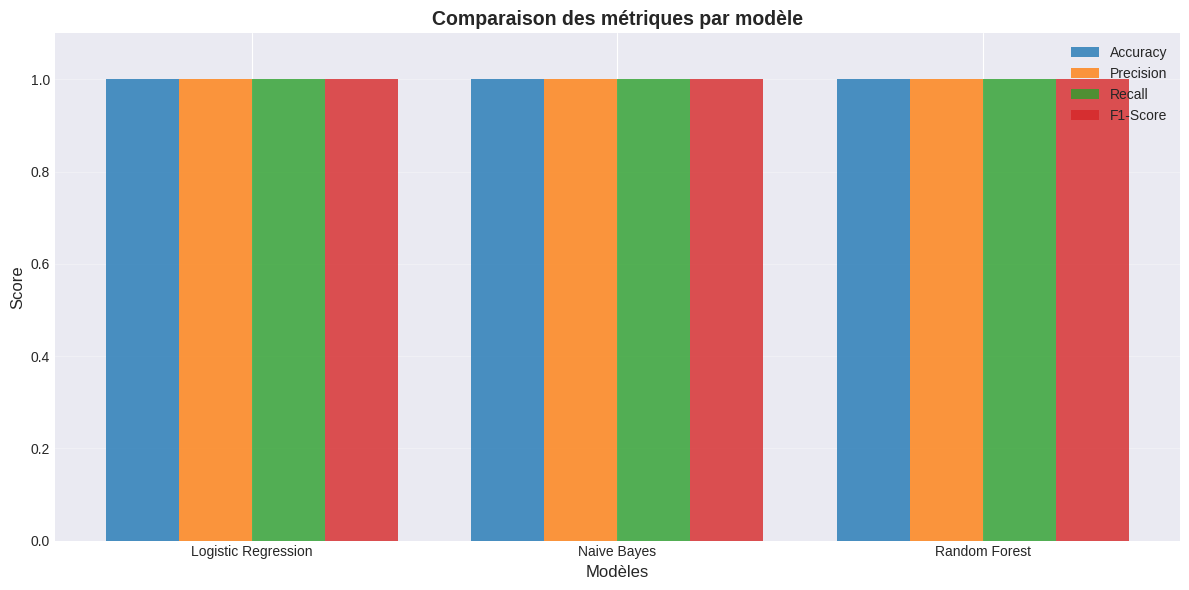

In [9]:
# Visualisation des métriques
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(results_df))
width = 0.2

ax.bar(x - 1.5*width, results_df['Accuracy'], width, label='Accuracy', alpha=0.8)
ax.bar(x - 0.5*width, results_df['Precision'], width, label='Precision', alpha=0.8)
ax.bar(x + 0.5*width, results_df['Recall'], width, label='Recall', alpha=0.8)
ax.bar(x + 1.5*width, results_df['F1-Score'], width, label='F1-Score', alpha=0.8)

ax.set_xlabel('Modèles', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Comparaison des métriques par modèle', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Modèle'])
ax.legend()
ax.set_ylim([0, 1.1])
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 🎯 8. Matrice de confusion

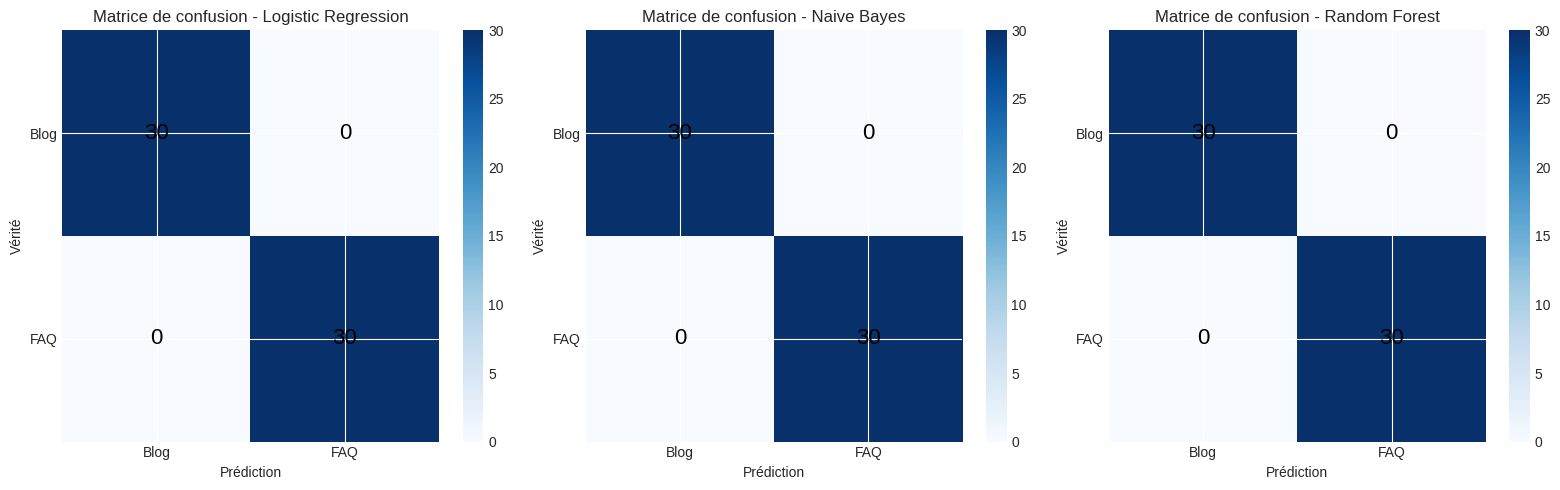

In [10]:
# Matrices de confusion pour tous les modèles
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, (name, pipeline) in enumerate(pipelines.items()):
    y_pred = pipeline.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Affichage
    im = axes[idx].imshow(cm, cmap='Blues', aspect='auto')
    axes[idx].set_xticks([0, 1])
    axes[idx].set_yticks([0, 1])
    axes[idx].set_xticklabels(['Blog', 'FAQ'])
    axes[idx].set_yticklabels(['Blog', 'FAQ'])
    axes[idx].set_xlabel('Prédiction')
    axes[idx].set_ylabel('Vérité')
    axes[idx].set_title(f'Matrice de confusion - {name}')
    
    # Ajouter les valeurs
    for i in range(2):
        for j in range(2):
            text = axes[idx].text(j, i, cm[i, j],
                                 ha="center", va="center", color="black", fontsize=16)
    
    plt.colorbar(im, ax=axes[idx])

plt.tight_layout()
plt.show()

## 📋 9. Rapport de classification détaillé

In [11]:
# Rapport détaillé pour le meilleur modèle (Logistic Regression)
best_model = pipelines['Logistic Regression']
y_pred = best_model.predict(X_test)

print("=" * 60)
print("RAPPORT DE CLASSIFICATION - Logistic Regression")
print("=" * 60)
print(classification_report(y_test, y_pred))

RAPPORT DE CLASSIFICATION - Logistic Regression
              precision    recall  f1-score   support

        Blog       1.00      1.00      1.00        30
         FAQ       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



## 🔄 10. Validation croisée

In [12]:
# Cross-validation pour le meilleur modèle
print("Cross-validation (5-fold)...\n")

cv_scores = cross_val_score(
    best_model,
    X_train,
    y_train,
    cv=5,
    scoring='f1_weighted'
)

print(f"Scores par fold: {cv_scores}")
print(f"\nMoyenne: {cv_scores.mean():.4f}")
print(f"Écart-type: {cv_scores.std():.4f}")

Cross-validation (5-fold)...

Scores par fold: [1. 1. 1. 1. 1.]

Moyenne: 1.0000
Écart-type: 0.0000


## 🔮 11. Prédictions sur nouveaux exemples

In [13]:
# Nouveaux textes à classifier
new_texts = [
    "Comment puis-je annuler ma commande ?",
    "Dans cet article approfondi, nous explorons les dernières avancées en intelligence artificielle et leurs implications pour l'avenir de la technologie. Les chercheurs travaillent sur des modèles de plus en plus sophistiqués.",
    "Quelle est votre adresse email ?",
    "Le développement d'applications mobiles nécessite une compréhension des frameworks modernes comme React Native et Flutter. Ces outils permettent de créer des applications performantes pour iOS et Android."
]

# Prédictions
predictions = best_model.predict(new_texts)
probabilities = best_model.predict_proba(new_texts)

print("=" * 80)
print("PRÉDICTIONS SUR NOUVEAUX TEXTES")
print("=" * 80)
for i, text in enumerate(new_texts):
    print(f"\nTexte {i+1}: {text[:80]}...")
    print(f"Prédiction: {predictions[i]}")
    print(f"Confiance: Blog={probabilities[i][0]:.2%}, FAQ={probabilities[i][1]:.2%}")
    print("-" * 80)

PRÉDICTIONS SUR NOUVEAUX TEXTES

Texte 1: Comment puis-je annuler ma commande ?...
Prédiction: FAQ
Confiance: Blog=4.52%, FAQ=95.48%
--------------------------------------------------------------------------------

Texte 2: Dans cet article approfondi, nous explorons les dernières avancées en intelligen...
Prédiction: Blog
Confiance: Blog=89.94%, FAQ=10.06%
--------------------------------------------------------------------------------

Texte 3: Quelle est votre adresse email ?...
Prédiction: FAQ
Confiance: Blog=18.56%, FAQ=81.44%
--------------------------------------------------------------------------------

Texte 4: Le développement d'applications mobiles nécessite une compréhension des framewor...
Prédiction: Blog
Confiance: Blog=88.09%, FAQ=11.91%
--------------------------------------------------------------------------------


## 🎯 EXERCICE : Créez votre propre pipeline

**Objectif**: Construire et évaluer un pipeline de classification binaire.

**Instructions**:
1. Utilisez le même dataset ou créez-en un nouveau
2. Expérimentez avec différents paramètres TF-IDF:
   - `max_features`: nombre de features à garder
   - `ngram_range`: unigrammes, bigrammes, trigrammes
   - `min_df`, `max_df`: fréquence minimale/maximale
3. Testez d'autres algorithmes (SVM, XGBoost, etc.)
4. Comparez les performances avec différentes métriques
5. Analysez les erreurs de classification

**Questions à explorer**:
- Quel modèle donne les meilleurs résultats ?
- Quels paramètres TF-IDF sont les plus efficaces ?
- Y a-t-il du surapprentissage (overfitting) ?
- Comment améliorer les performances ?

In [14]:
# VOTRE CODE ICI
# Exemple de structure:

# 1. Créer un nouveau pipeline
# my_pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer(...)),
#     ('classifier', ...)
# ])

# 2. Entraîner
# my_pipeline.fit(X_train, y_train)

# 3. Évaluer
# y_pred = my_pipeline.predict(X_test)
# print(classification_report(y_test, y_pred))

# 4. Comparer avec les autres modèles
# ...

## 📝 Conclusion

Dans cette séance, nous avons appris à :
- Créer des pipelines scikit-learn pour enchaîner preprocessing et modélisation
- Utiliser TF-IDF pour vectoriser du texte
- Implémenter une classification binaire baseline
- Évaluer les modèles avec plusieurs métriques (accuracy, precision, recall, F1)
- Comparer différents algorithmes de classification
- Utiliser la validation croisée pour estimer la performance

**Points clés à retenir** :
1. Les **pipelines** rendent le code plus propre et évitent les fuites de données
2. **TF-IDF** est une méthode simple mais efficace pour le texte
3. Le **train/test split stratifié** maintient les proportions de classes
4. Plusieurs **métriques** sont nécessaires pour évaluer un modèle (pas seulement accuracy)
5. La **validation croisée** donne une estimation plus robuste des performances

**Prochaines étapes** :
- Expérimenter avec d'autres features (longueur, mots spéciaux, etc.)
- Tester des modèles plus complexes (ensembles, deep learning)
- Optimiser les hyperparamètres avec GridSearch
- Déployer le modèle en production

**Ressources supplémentaires** :
- Documentation scikit-learn: https://scikit-learn.org/
- Guide sur les pipelines: https://scikit-learn.org/stable/modules/compose.html